In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [33]:
def get_data(names):
    folder_path = './curve'
    paths = [os.path.join(folder_path, name) for name in names]
    return {name: torch.load(fp) for name, fp in zip(names, paths)}

In [34]:
def plot_heatmap_test_acc(beta_vec, eps_vec, names, barlim=(50,95)):
    
    curve_type1 ='train'
    curve_type2 ='test'
    
    eps_vec = np.log10(np.array(eps_vec))
    beta_vec = np.log10(np.array(beta_vec))
    
    curve_data = get_data(names)
    best_acc = []
    j=0
    for i in curve_data.keys():
        
        #loss = np.array(curve_data[i]['{}_loss'.format(curve_type1.lower())])
        acc = np.array(curve_data[i]['{}_acc'.format(curve_type2.lower())])
        
        index_best = np.argmax(acc)
        best_acc.append( np.round(acc[index_best],2) )           
        j+=1

    X, Y = np.meshgrid(eps_vec,beta_vec)
    Z = np.array(best_acc).reshape(len(beta_vec),-1)

    plt.figure(figsize=(8, 7))

    cmap_reversed = plt.cm.get_cmap('tab20c_r')
    cf = plt.pcolormesh(X, Y, Z, cmap=cmap_reversed, vmin=barlim[0], vmax=barlim[1])

    plt.xlabel(r'Log10($\epsilon$)', fontsize = 23, weight='bold')
    plt.ylabel(r'Log10($\alpha$)', fontsize = 23, weight='bold') 
    plt.xticks(fontsize = 19)
    plt.yticks(fontsize = 19)
    
    cb = plt.colorbar(cf, extend = 'neither', location='top',orientation='horizontal', pad=0.03).set_label(label='Test Accuracy',size=23, weight='bold')
    cf.figure.axes[1].tick_params(axis="x", labelsize=19)
    cf.figure.axes[1].invert_xaxis() 
    

In [35]:
def plot_heatmap_test_ppl(beta_vec, eps_vec, names, barlim=(50,95)):
    
    curve_type1 ='train'
    curve_type2 ='test'
    
    eps_vec = np.log10(np.array(eps_vec))
    beta_vec = np.log10(np.array(beta_vec))
    
    curve_data = get_data(names)
    best_acc = []
    j=0
    for i in curve_data.keys():
        
        #ppl_train = np.array(curve_data[i]['{}_loss'.format(curve_type1.lower())])
        ppl = np.array(curve_data[i]['{}_loss'.format(curve_type2.lower())])
        
        index_best = np.argmin(ppl)
        best_acc.append( np.round(ppl[index_best],2) )           
        j+=1

    X, Y = np.meshgrid(eps_vec,beta_vec)
    Z = np.array(best_acc).reshape(len(beta_vec),-1)

    plt.figure(figsize=(8, 7))

    cmap_reversed = plt.cm.get_cmap('tab20c')
    cf = plt.pcolormesh(X, Y, Z, cmap=cmap_reversed, vmin=barlim[0], vmax=barlim[1])

    plt.xlabel(r'Log10($\epsilon$)', fontsize = 23, weight='bold')
    plt.ylabel(r'Log10($\alpha$)', fontsize = 23, weight='bold') 
    plt.xticks(fontsize = 19)
    plt.yticks(fontsize = 19)
    
    cb = plt.colorbar(cf, extend = 'neither', location='top',orientation='horizontal', pad=0.03).set_label(label='Test Perplexity',size=23, weight='bold')
    cf.figure.axes[1].tick_params(axis="x", labelsize=19)
    cf.figure.axes[1].invert_xaxis() 
    

## Classification task

/tmp/ipykernel_63800/3085773188.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('tab20c_r')


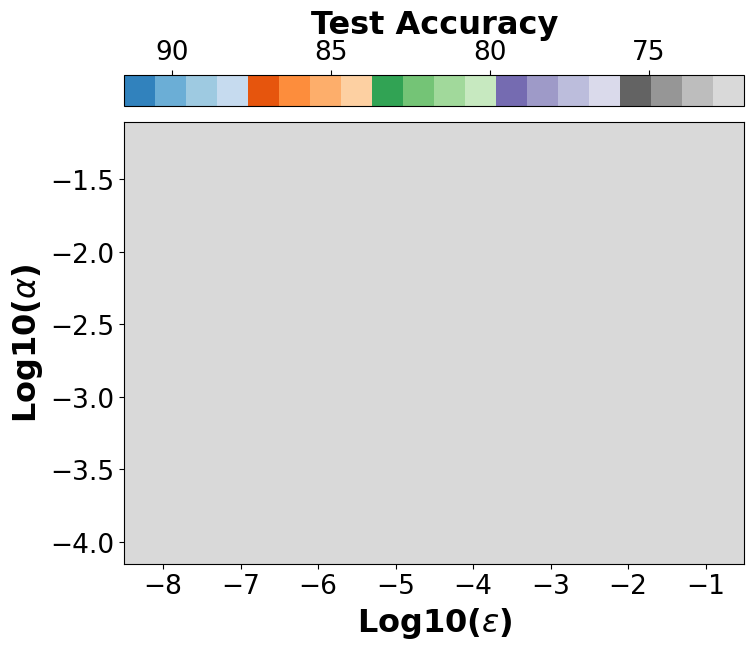

In [36]:
model = 'vgg'
optim = 'adam'

eps_vec = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
lr_vec = [1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2]

names = []
labels = []

for lr in lr_vec:
    for eps in eps_vec:
        names.append(model+'-'+optim+'-lr'+str(lr)+'-betas0.9-0.999-eps'+str(eps)+'-wdecay0.0005-run0-resetFalse')    

                    
plot_heatmap_test_acc(lr_vec, eps_vec, names, barlim=(72,91.5)) 

## Language Modeling task

/tmp/ipykernel_63800/2863569807.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('tab20c')


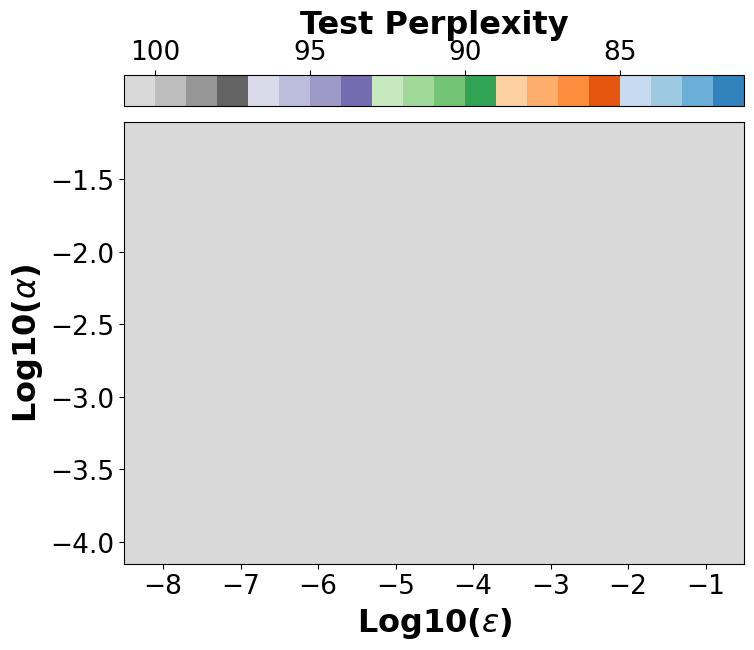

In [37]:
layer = 1
optim = 'adam'

eps_vec = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lr_vec = [1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1]

names = []
labels = []

for lr in lr_vec:
    for eps in eps_vec:
        names.append('PTB.pt-niter-200-optimizer-'+optim+'-nlayers'+str(layer)+'-lr'+str(lr)+'-clip-0.25-eps'+str(eps)+'-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]')


                    
plot_heatmap_test_ppl(lr_vec, eps_vec, names, barlim=(81,101)) 